In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import gwdet
from pdet import VT_pop_uniform_q, p

/Users/Federico/Documents/Corsi di studio/Università/Tesi/master_thesis/.venv/lib/python3.11/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal
/Users/Federico/Documents/Corsi di studio/Università/Tesi/master_thesis/.venv/lib/python3.11/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for r

In [2]:
# m1_min, m1_max, m1_len = 1, 100, 100
# q = 0.8 # m2 / m1, with m2 <= m1. Below q = 0.3 plots become a bit messy
# z_min, z_max, z_len = 1e-4, 2.2, 50
# m1 = np.linspace(m1_min, m1_max, m1_len)
# m2 = m1 * q
# z = np.linspace(z_min, z_max, z_len)

m1_min, m1_max, m1_w = 1, 100, 1
q = 0.8
z_min, z_max, z_w = 1e-4, 10, 0.1
m1 = np.arange(m1_min, m1_max, m1_w)
m2 = m1 * q
z = np.arange(z_min, z_max, z_w)

In [3]:
# p = gwdet.detectability()

In [4]:
p_det = np.zeros((len(z), len(m1)))

for i, _z in enumerate(z):
    p_det[i] = p(m1, m2, np.zeros(len(m1)) + _z)

In [5]:
np.sum(p_det < 0)

np.int64(3)

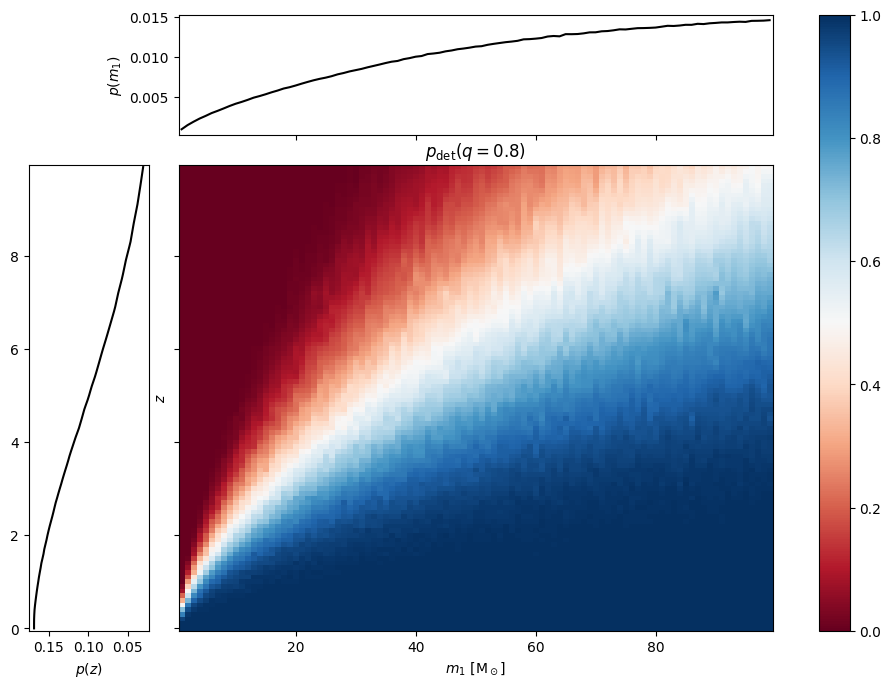

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
divider = make_axes_locatable(ax)

ax_m = divider.append_axes('top', 1.2, pad=0.3, sharex=ax)
ax_z = divider.append_axes('left', 1.2, pad=0.3, sharey=ax)

ax.tick_params(labelleft=False)
ax_m.tick_params(labelbottom=False)

ax.set_title(r'$p_\text{{det}} (q = {0})$'.format(q))
ax.set_xlabel(r'$m_1\ [\text{M}_\odot$]')
ax.set_ylabel(r'$z$')

cmap = plt.colormaps['RdBu']
im = ax.pcolormesh(m1, z, p_det, cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=1))

fig.colorbar(im, ax=ax)

ax_m.set_ylabel(r'$p(m_1)$')

ax_m.plot(m1, np.sum(p_det, axis=0) / np.trapezoid(np.sum(p_det, axis=0), m1), color='black')

ax_z.set_xlabel(r'$p(z)$')

ax_z.xaxis.set_inverted(True)

ax_z.plot(np.sum(p_det, axis=1) / np.trapezoid(np.sum(p_det, axis=1), z), z, color='black')

plt.show()

In [7]:
if __name__ == '__main__':
    VT = VT_pop_uniform_q(1, z, m1, q)

Computing VT for each (m, z) pair for a uniformly distributed population of sources with fixed q = 0.8:   0%|          | 0/9702 [00:00<?, ?it/s]/Users/Federico/Documents/Corsi di studio/Università/Tesi/master_thesis/.venv/lib/python3.11/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/Federico/Documents/Corsi di studio/Università/Tesi/master_thesis/.venv/lib/python3.11/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/Federico/Documents/Corsi di studio/Università/Tesi/master_thesis/.ve

In [8]:
np.sum(VT < 0)

np.int64(0)

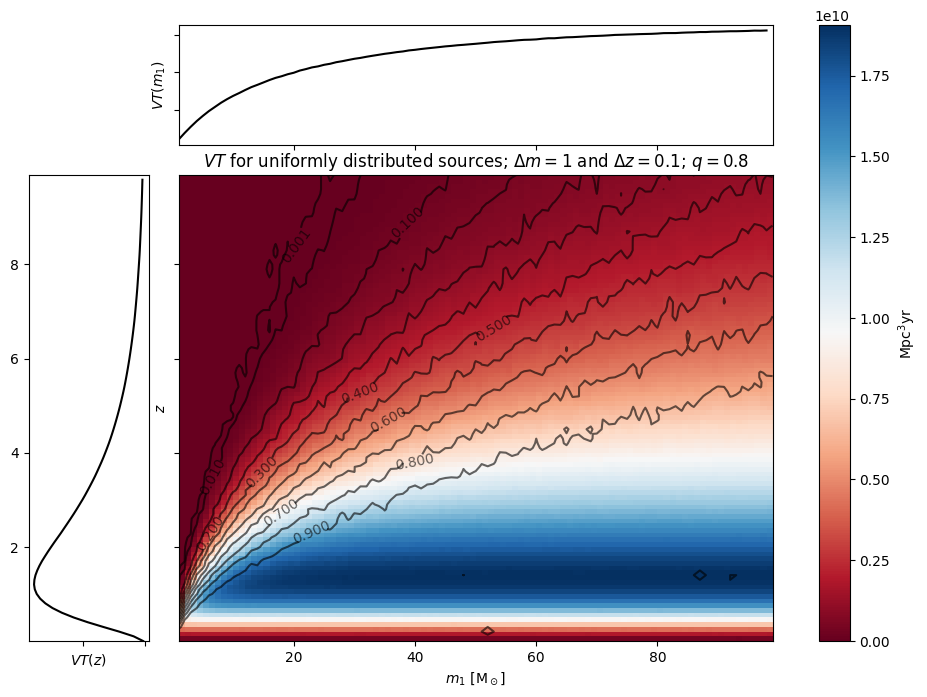

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

divider = make_axes_locatable(ax)

ax_m = divider.append_axes('top', 1.2, pad=0.3, sharex=ax)
ax_z = divider.append_axes('left', 1.2, pad=0.3, sharey=ax)

ax.tick_params(labelleft=False)
ax_m.tick_params(labelbottom=False, labelleft=False)
ax_z.tick_params(labelbottom=False)

ax.set_title(r'$VT$ for uniformly distributed sources; $\Delta m = {0}$ and $\Delta z = {1}$; $q = {2}$'.format(m1_w,
                                                                                                                z_w,
                                                                                                                q))
ax.set_xlabel(r'$m_1\ [\text{M}_\odot$]')
ax.set_ylabel(r'$z$')

# VT heatmap
cmap = plt.colormaps['RdBu']
im = ax.pcolormesh(m1, z, VT, cmap=cmap, norm=mpl.colors.Normalize(vmin=np.min(VT), vmax=np.max(VT)))

# pdet contour levels
levels = [1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
cf = ax.contour(m1, z, p_det, levels=levels, colors='black', alpha=0.6)
ax.clabel(cf)

cbar = fig.colorbar(im, ax=ax, label=r'$\text{Mpc}^3 \text{yr}$')

ax_m.set_ylabel(r'$VT(m_1)$')

ax_m.plot(m1[:-1], np.sum(VT, axis=0), color='black')

ax_z.set_xlabel(r'$VT(z)$')

ax_z.xaxis.set_inverted(True)

ax_z.plot(np.sum(VT, axis=1), z[:-1], color='black')

plt.show()

/var/folders/05/2fbv44555hx420qclxnfbd4c0000gn/T/ipykernel_4710/3692990110.py:8: RuntimeWarning: divide by zero encountered in divide
  VT_ratio_map = target_VT / VT


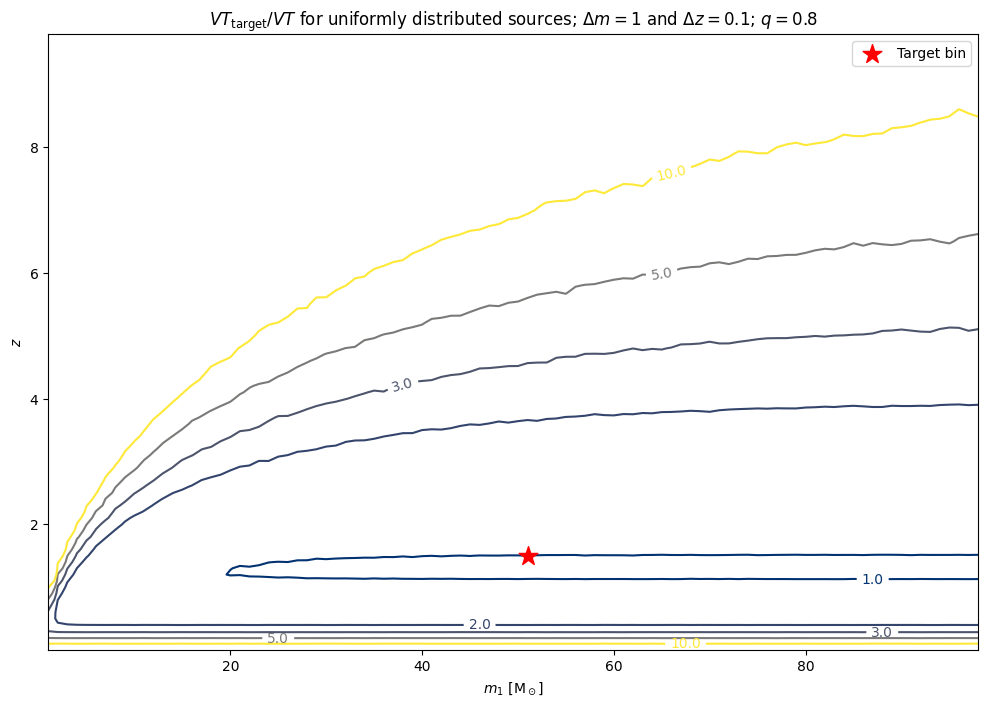

In [10]:
# # Define the target bin using its relative position in the grid
# rx, ry = 0.5, 0.3
# target_bin = (int(rx * (VT.T.shape[0] - 1)), int(ry * (VT.T.shape[1] - 1)))

target_bin = (50, 15)

target_VT = VT.T[*target_bin]
VT_ratio_map = target_VT / VT

fig, ax = plt.subplots(figsize=(12, 8))

ax.set_title(r'${{VT}}_\text{{target}} / VT$ for uniformly distributed sources; $\Delta m = {0}$ and $\Delta z = {1}$; $q = {2}$'.format(m1_w,
                                                                                                                                         z_w,
                                                                                                                                         q))
ax.set_xlabel(r'$m_1\ [\text{M}_\odot$]')
ax.set_ylabel(r'$z$')

cmap = plt.colormaps['cividis']
levels = [0.1, 0.5, 1, 2, 3, 5, 10]

cf = ax.contour(m1[:-1], z[:-1], VT_ratio_map, levels=levels, cmap=cmap)
ax.clabel(cf)

ax.scatter(m1[target_bin[0]], z[target_bin[1]], color='red', marker='*', s=200, zorder=100, label='Target bin')

ax.legend()

plt.show()